<center> <img src=header.png  width="1200"/> </center>

## 1. Постановка задачи


Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки на несколько групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
# ваш код здесь
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
taxi_data['pickup_datetime'].dt.date.sort_values(ignore_index=True).loc[[0,taxi_data.index[-1]]]

0          2016-01-01
1458643    2016-06-30
Name: pickup_datetime, dtype: object

### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [4]:
# ваш код здесь
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [5]:
# ваш код здесь
print('Уникальное количество таксопарков: ', taxi_data['vendor_id'].nunique())
print('----------------------------------------------------------')
print('Максимальное количество пассажиров: ', taxi_data['passenger_count'].max())
print('----------------------------------------------------------')
print('Чему равна средняя длительность поездки в сек.: ', taxi_data.describe().round()['trip_duration'].iloc[1])
print('----------------------------------------------------------')
print('Чему равна медианная длительность поездки в сек.: ', taxi_data.describe().round()['trip_duration'].iloc[4])
print('----------------------------------------------------------')
print('Чему равна минимальная длительность поездки в сек.: ', taxi_data.describe().round()['trip_duration'].iloc[2])
print('----------------------------------------------------------')
print('Чему равна максимальная длительность поездки в сек.: ', taxi_data.describe().round()['trip_duration'].iloc[6])

Уникальное количество таксопарков:  2
----------------------------------------------------------
Максимальное количество пассажиров:  9
----------------------------------------------------------
Чему равна средняя длительность поездки в сек.:  959.0
----------------------------------------------------------
Чему равна медианная длительность поездки в сек.:  662.0
----------------------------------------------------------
Чему равна минимальная длительность поездки в сек.:  1.0
----------------------------------------------------------
Чему равна максимальная длительность поездки в сек.:  3526282.0


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - порядковый номер дня недели (число), в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [6]:
# ваш код здесь
# функция для создания столбцов, даты, час и день недели.
def add_datetime_features(data):
    data.insert(loc=3,column = 'pickup_date',value=data['pickup_datetime'].dt.date)
    data.insert(loc=4,column = 'pickup_hour',value=data['pickup_datetime'].dt.hour)
    data.insert(loc=5,column = 'pickup_day_of_week',value=data['pickup_datetime'].dt.day_of_week)
    return data
taxi_data=add_datetime_features(taxi_data)

print('Количество поездок в субботу:',taxi_data[taxi_data['pickup_day_of_week'] == 5].shape[0])
print('--------------------------------------')
print('Поездок в среднем совершается в день:',taxi_data.groupby("pickup_date")['id'].count().mean().round())

Количество поездок в субботу: 220868
--------------------------------------
Поездок в среднем совершается в день: 8015.0


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [7]:
holiday_data = pd.read_csv('holiday_data.csv', sep=';')
holiday_data.head(3)                            

,day,date,holiday
0,Friday,2016-01-01,New Years Day
1,Monday,2016-01-18,Martin Luther King Jr. Day
2,Friday,2016-02-12,Lincoln's Birthday


In [8]:
# ваш код сдесь
def add_holiday_features(data,holiday_data):
    data.insert(loc=6,column = 'pickup_holiday',value=data['pickup_date'].astype('str').apply(
                                    lambda x:1 if x in holiday_data['date'].values else 0))
    return data
add_holiday_features(taxi_data,holiday_data).head(3)  
mask1 = taxi_data['pickup_holiday']==1
print('Медианная длительность поездки на такси в праздничные дни (в сек.) равна:',taxi_data[mask1]['trip_duration'].median())

Медианная длительность поездки на такси в праздничные дни (в сек.) равна: 585.0


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [9]:
osrm_data = pd.read_csv('osrm_data_train.csv')
osrm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458643 entries, 0 to 1458642
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1458643 non-null  object 
 1   starting_street       1458643 non-null  object 
 2   end_street            1458643 non-null  object 
 3   total_distance        1458643 non-null  float64
 4   total_travel_time     1458643 non-null  float64
 5   number_of_steps       1458643 non-null  int64  
 6   street_for_each_step  1458643 non-null  object 
 7   distance_per_step     1458643 non-null  object 
 8   travel_time_per_step  1458643 non-null  object 
 9   step_maneuvers        1458643 non-null  object 
 10  step_direction        1458643 non-null  object 
 11  step_location_list    1458643 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 133.5+ MB


In [10]:
# ваш код здесь
def add_osrm_features(data,OSRM):
    return data.merge(OSRM[['id','total_distance','total_travel_time','number_of_steps']],how='left',on='id')
taxi_data = add_osrm_features(taxi_data,osrm_data)
time_delta = abs(taxi_data['trip_duration'].median()-taxi_data['total_travel_time'].median()).round()
print('разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM :',time_delta)
print('количество пропусков в данных:',taxi_data['total_travel_time'].isnull().sum())

разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM : 372.0
количество пропусков в данных: 1


In [11]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [12]:
# ваш код здесь
def add_geographical_features(data):
    lat1 = data['pickup_latitude']
    lng1 = data['pickup_longitude']
    lat2 = data['dropoff_latitude']
    lng2 = data['dropoff_longitude']
    data['haversine_distance'] = get_haversine_distance(lat1, lng1, lat2, lng2)
    data['direction'] = get_angle_direction(lat1, lng1, lat2, lng2)
    return data
add_geographical_features(taxi_data)

print('Медианное расстояние Хаверсина поездок (в киллометрах) равно:',taxi_data['haversine_distance'].median().round(2) )


    

Медианное расстояние Хаверсина поездок (в киллометрах) равно: 2.09


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [13]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

# ваш код здесь
def add_cluster_features(data,model):
    data['geo_cluster'] = model.predict(data[['pickup_latitude', 'pickup_longitude','dropoff_latitude', 'dropoff_longitude']])
    return data
add_cluster_features(taxi_data,kmeans).head(3)
print(taxi_data['geo_cluster'].value_counts().min(),'поездки содержится в наименьшем по размеру географическом кластере')


2 поездки содержится в наименьшем по размеру географическом кластере


/home/roman/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [14]:
weather_data = pd.read_csv('weather_data.csv')
weather_data.head(3)

,time,temperature,windchill,heat index,humidity,pressure,dew Point,visibility,wind dir,wind speed,gust speed,precip,events,conditions,date,hour
0,2015-12-31 02:00:00,7.8,7.1,NaN,0.89,1017.0,6.1,8.0,NNE,5.6,0.0,0.8,NaN,Overcast,2015-12-31,2
1,2015-12-31 03:00:00,7.2,5.9,NaN,0.90,1016.5,5.6,12.9,Variable,7.4,0.0,0.3,NaN,Overcast,2015-12-31,3
2,2015-12-31 04:00:00,7.2,NaN,NaN,0.90,1016.7,5.6,12.9,Calm,0.0,0.0,0.0,NaN,Overcast,2015-12-31,4


In [15]:
weather_data = pd.read_csv('weather_data.csv')
# ваш код здесь
def add_weather_features(data,weather):
    data['pickup_date']=data['pickup_date'].astype('str')
    mask=['date','hour','temperature','visibility','wind speed','precip','events']
    df=data.merge(weather[mask],how='left',left_on=[
    'pickup_date','pickup_hour'],right_on=['date','hour']).drop(['date','hour'],axis=1)
    return df
    
taxi_data = add_weather_features(taxi_data,weather_data)    
print('Количество поездок было совершено в снежную погоду:',(taxi_data['events'] == 'Snow').sum())
print('--------------------------------------------------------------------------------------------------')
print('Процент от общего количества наблюдений занимают пропуски в столбцах с погодными условиями:',((taxi_data['temperature'].isna().sum()/taxi_data.shape[0])*100).round(2),'%')


Количество поездок было совершено в снежную погоду: 13126
--------------------------------------------------------------------------------------------------
Процент от общего количества наблюдений занимают пропуски в столбцах с погодными условиями: 0.82 %


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(),  которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [16]:
# ваш код здесь
def fill_null_weather_data(data):
    data[['temperature','visibility','wind speed','precip']] = data[
        ['temperature','visibility','wind speed','precip']].fillna(
            data.groupby('pickup_date')[
                ['temperature','visibility','wind speed','precip']].transform('median'))
    
    values={'total_distance':data['total_distance'].median(),
            'total_travel_time':data['total_travel_time'].median(),
            'number_of_steps':data['number_of_steps'].median()}
    
    data = data.fillna(values)
    return data
taxi_data = fill_null_weather_data(taxi_data)
print('медиана в столбце temperature после заполнения пропусков равна:',taxi_data['temperature'].median().round(1))

медиана в столбце temperature после заполнения пропусков равна: 11.1


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


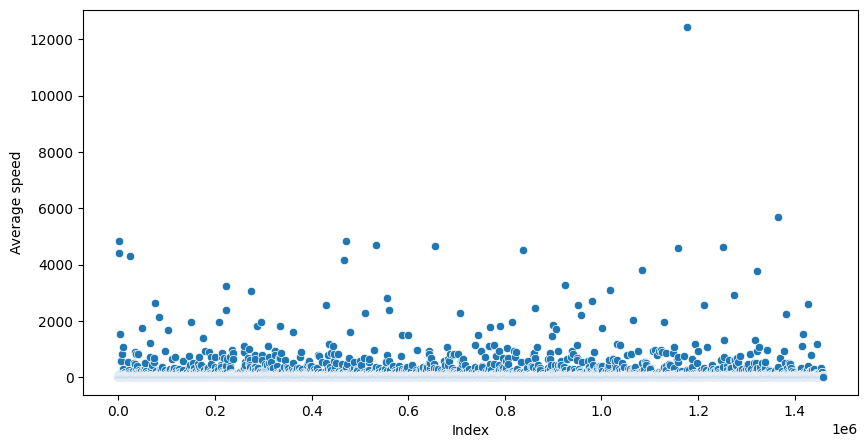

In [17]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [18]:
# ваш код здесь
print('Количество выбросов по признаку длительности поездки :',taxi_data[taxi_data['trip_duration'] > 86400].shape[0])
print('Количество выбросов по признаку скорости:',avg_speed[avg_speed>300].shape[0])

drop_td = taxi_data[taxi_data['trip_duration'] > 86400].index
index_as = avg_speed[avg_speed>300].index

taxi_data.drop(drop_td.append(index_as),axis=0,inplace=True)



Количество выбросов по признаку длительности поездки : 4
Количество выбросов по признаку скорости: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [21]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

p-value = 0.000
Распределение не нормальное


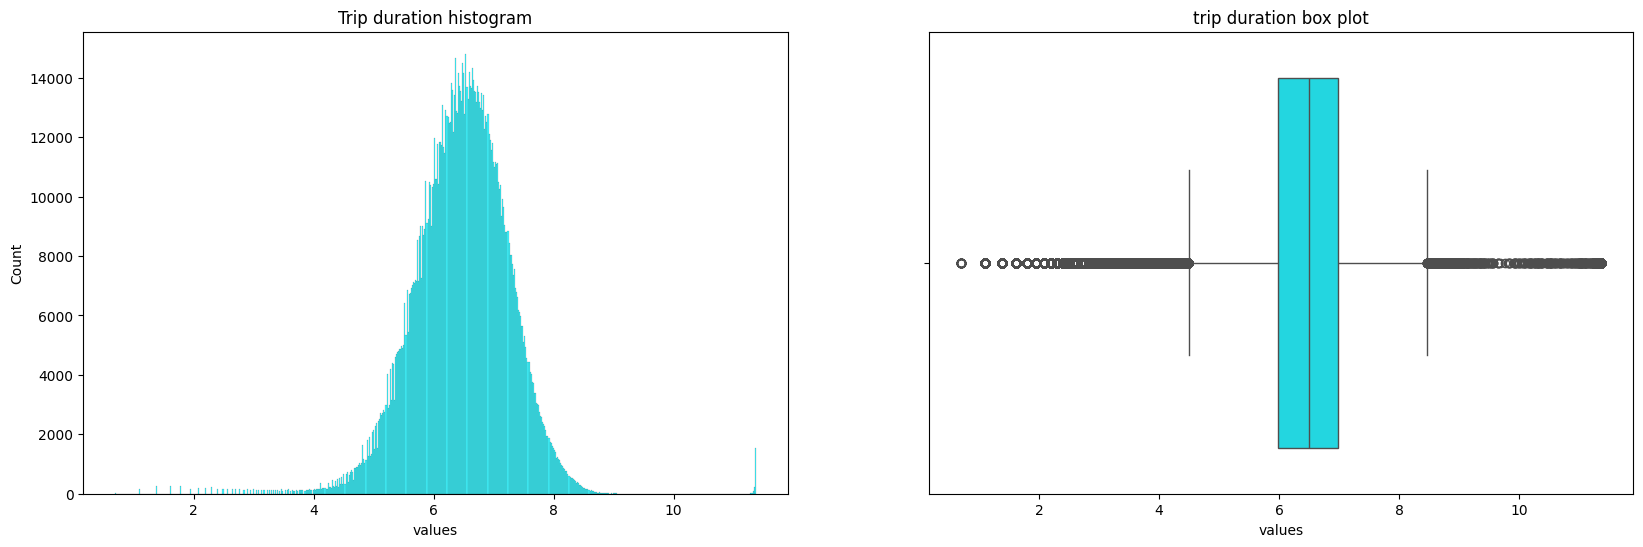

In [22]:
# ваш код здесь
import scipy
# Задаем уровень значимости альфа
alpha = 0.5
# Делаем тест на нормальность  Д’Агостино-Пирсона
_, p = scipy.stats.normaltest(taxi_data['trip_duration_log'])
print('p-value = %.3f' % (p))
# интерпретируем результат
if p <= alpha:
    print('Распределение не нормальное')
else:
    print('Распределение нормальное')

# создаем фигуру из двух координатных плоскостей
fig,ax = plt.subplots(1,2,figsize=(20,6))
# первый график
sns.histplot(taxi_data['trip_duration_log'],ax=ax[0],color='#04F2FF')
ax[0].set_xlabel('values')
ax[0].set_title('Trip duration histogram')
# второй график
sns.boxplot(taxi_data['trip_duration_log'],ax=ax[1],orient='h',color="#04F2FF")
ax[1].set_xlabel('values')
ax[1].set_title('trip duration box plot')
# Выводим на экран 
plt.show()

Хотя на вид похоже на нормальное.

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

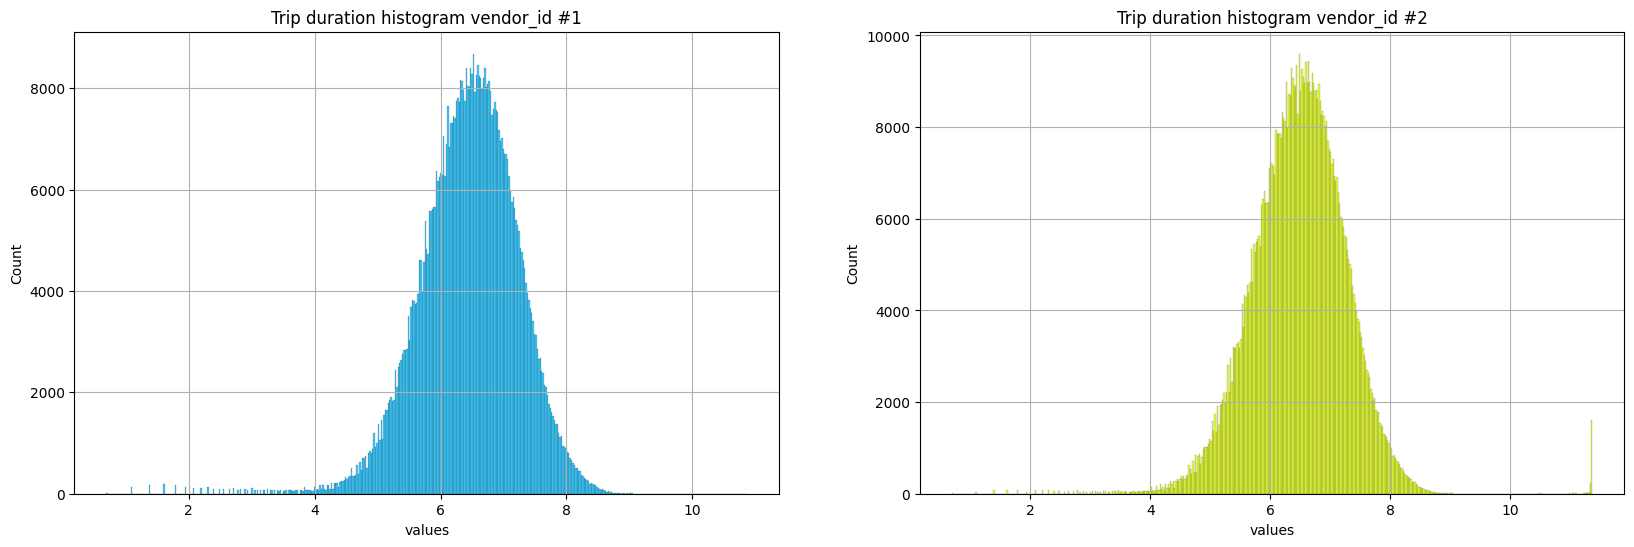

In [23]:
# ваш код здесь
# Создаем маски, для фильтрации по признаку идентификатора таксопарка
mask1 = taxi_data[taxi_data['vendor_id'] == 1]
mask2 = taxi_data[taxi_data['vendor_id'] == 2]
# фигура из двух плоскостей
fig,ax = plt.subplots(1,2,figsize=(20,6))
# первый график
sns.histplot(mask1['trip_duration_log'],ax=ax[0],color='#02BCFF')
ax[0].set_xlabel('values')
ax[0].set_title('Trip duration histogram vendor_id #1')
ax[0].grid()
# второй график
sns.histplot(mask2['trip_duration_log'],ax=ax[1],color='#E1FF02')
ax[1].set_xlabel('values')
ax[1].set_title('Trip duration histogram vendor_id #2')
ax[1].grid()
# Выводим на экран
plt.show()

Распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

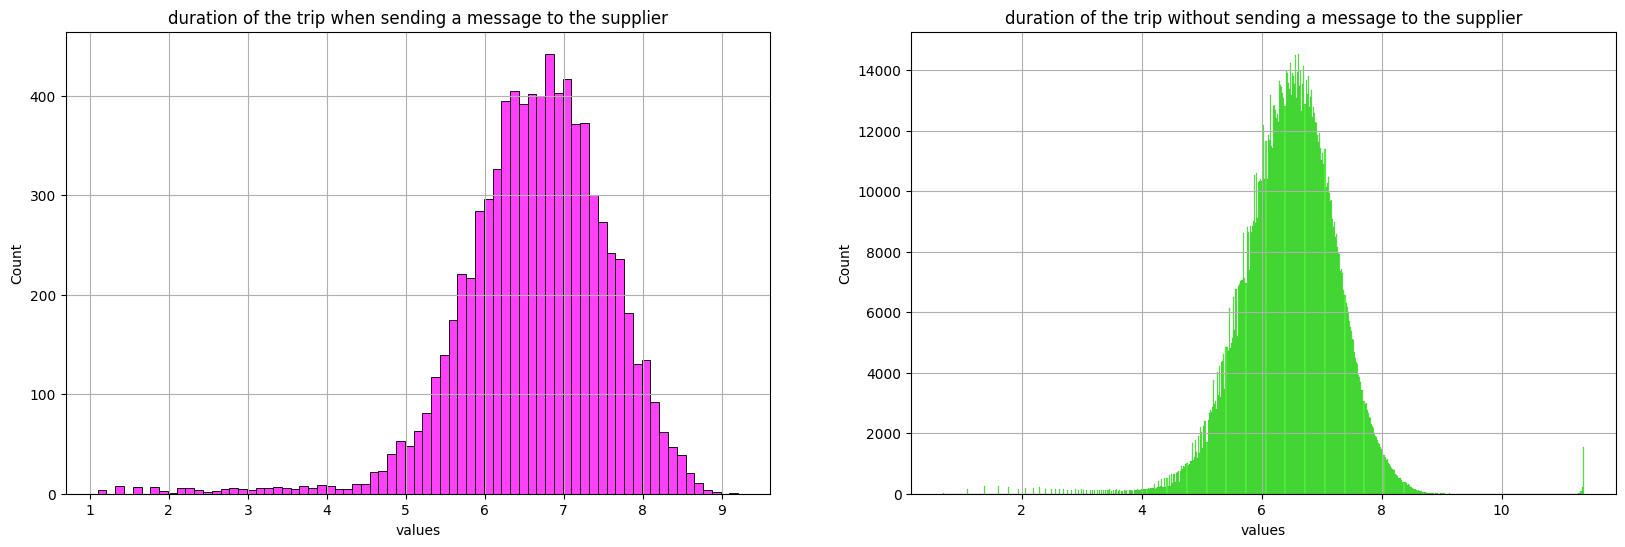

In [24]:
# ваш код здесь
# Создаем маски, для фильтрации по признаку статус отправки сообщения поставщику
mask_yes = taxi_data[taxi_data['store_and_fwd_flag'] == 'Y']
mask_no = taxi_data[taxi_data['store_and_fwd_flag'] == 'N']

# фигура из двух плоскостей
fig,ax = plt.subplots(1,2,figsize=(20,6))

# первый график
sns.histplot(mask_yes['trip_duration_log'],ax=ax[0],color='#FF00F7')
ax[0].set_xlabel('values')
ax[0].set_title('duration of the trip when sending a message to the supplier')
ax[0].grid()
# второй график
sns.histplot(mask_no['trip_duration_log'],ax=ax[1],color='#1AFF00')
ax[1].set_xlabel('values')
ax[1].set_title('duration of the trip without sending a message to the supplier')
# Выводим на экран
ax[1].grid()
plt.show()


Распределения в группах значительно отличаются, признак store_and_fwd_flag имеет значение при определении длительности поездки.Тут можно так же заметить одну важную особенность, отправка сообщений сохраняется только на поездки коротких дистанций, а вот если дистанции аномально большие, то о них никаких сообщений нет диспетчеру.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

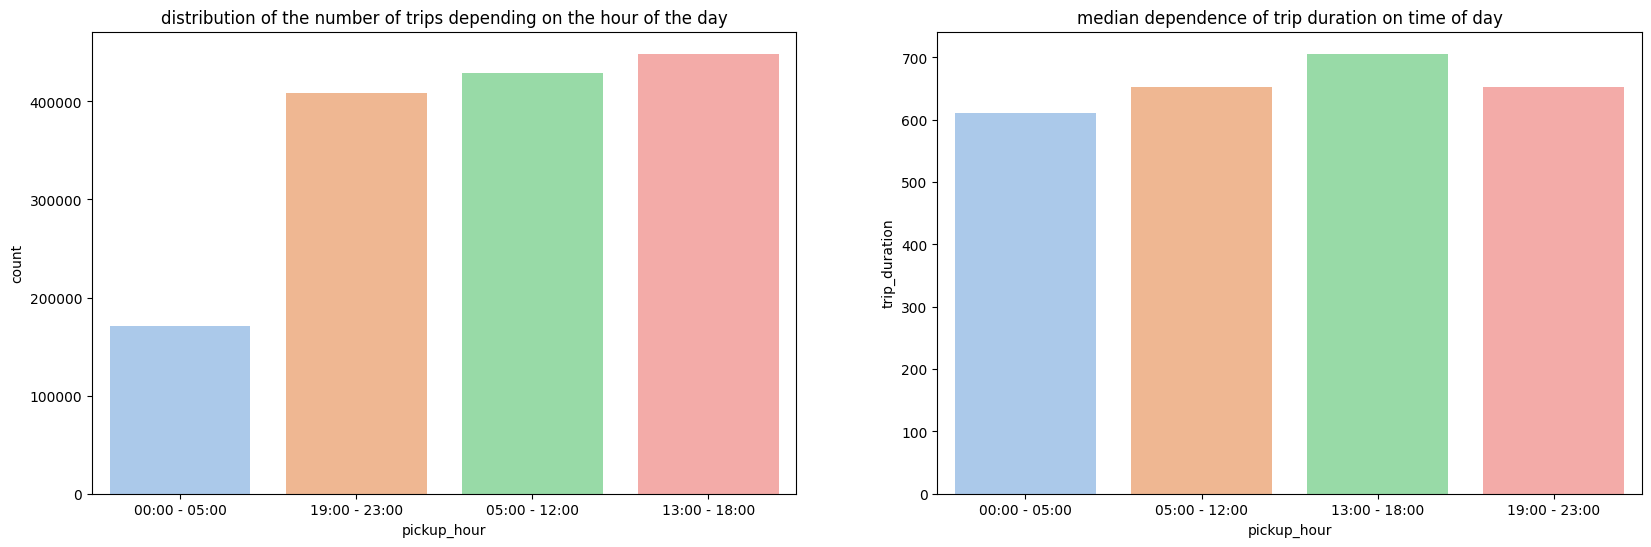

Время, когда такси вызывается меньше всего: 00:00 - 05:00
период, когда наблюдаются самые длительные поездки по медианне: 13:00 - 18:00


In [25]:
# ваш код здесь
# Создаем маску, для фильтрации по признаку час выезда
# для удобства преобразований и изменений в таблице, сделаем копию исходного датасета.
taxi = taxi_data.copy()
def func_time(x):
    if (x >= 0) and x <= 5: return '00:00 - 05:00'
    if (x >=6) and (x <= 12): return '05:00 - 12:00'
    if (x >=13) and (x <= 18): return '13:00 - 18:00'
    if (x >=19) and (x <= 23): return '19:00 - 23:00'
taxi['pickup_hour'] = taxi['pickup_hour'].apply(func_time)

# фигура из двух плоскостей
fig,ax=plt.subplots(1,2,figsize=(20,6))
# график по периодам
df_1=taxi['pickup_hour'].value_counts().sort_values().reset_index()
sns.barplot(df_1,x='pickup_hour',y='count',hue='pickup_hour',palette='pastel',ax=ax[0]);
ax[0].set_title('distribution of the number of trips depending on the hour of the day');

# График по медианам периодов времени.
df_2=taxi.groupby('pickup_hour')['trip_duration'].median().reset_index()
sns.barplot(df_2,x='pickup_hour',y='trip_duration',hue='pickup_hour',ax=ax[1],palette='pastel');
ax[1].set_title('median dependence of trip duration on time of day');
plt.show()

print('Время, когда такси вызывается меньше всего:',taxi['pickup_hour'].value_counts().index[-1])
print('период, когда наблюдаются самые длительные поездки по медианне:',taxi.groupby('pickup_hour')[
    'trip_duration'].median().sort_values().index[-1])



### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


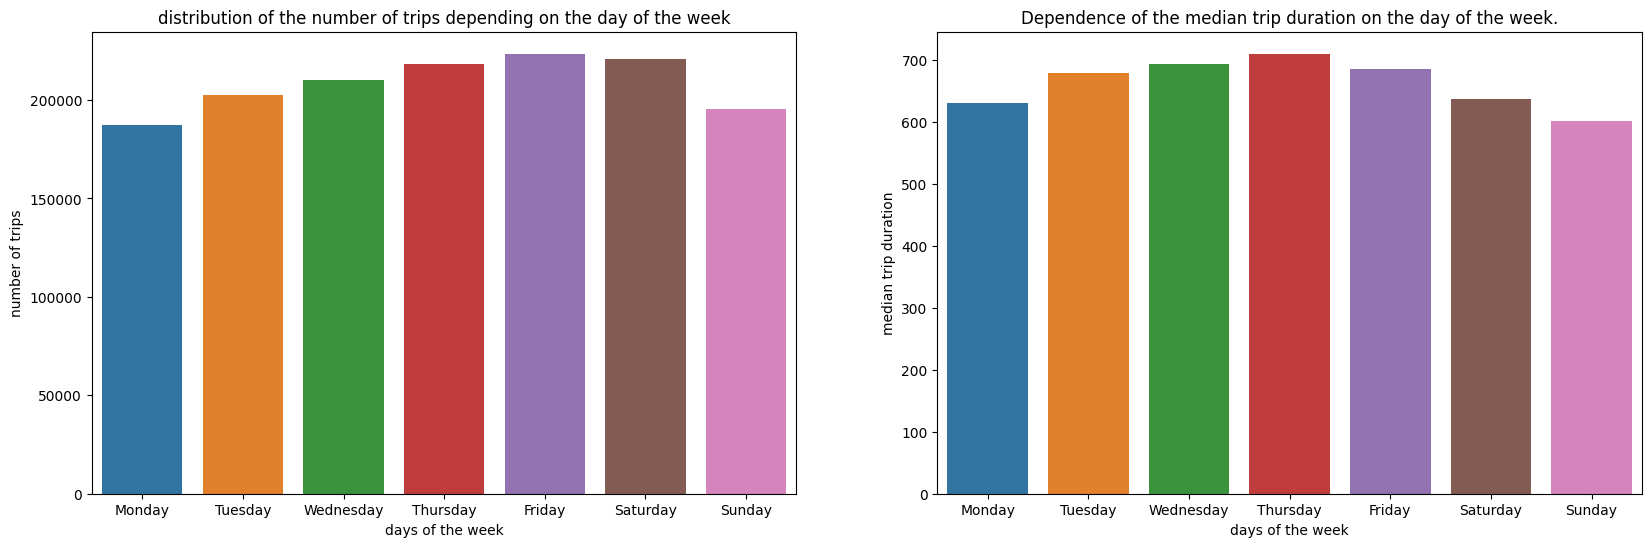

В Friday совершается больше всего поездок
В Sunday медианная длительность поездок наименьшая


In [26]:
# ваш код здесь
taxi = taxi_data.copy()
# Создаем фигуру из двух плоскостей
fig,ax=plt.subplots(1,2,figsize=(20,6))
# создадим новый признак, где укажим названия дней недели.
taxi['day_of_week'] = pd.to_datetime(taxi['pickup_date']).dt.day_name()
# Создаем маску, где мы группируем данные и сортируем от 0 до 6
mask_day_of_week = taxi.groupby(['pickup_day_of_week','day_of_week'])['id'].count().reset_index()
# Строим график
sns.barplot(data=mask_day_of_week,x='day_of_week',y='id',ax=ax[0],hue='pickup_day_of_week',legend=False,palette='tab10');
ax[0].set_title("distribution of the number of trips depending on the day of the week")
ax[0].set_xlabel('days of the week')
ax[0].set_ylabel('number of trips')

# Создаем маску, где мы группируем данные и сортируем от 0 до 6
mask_day_of_median = taxi.groupby(['pickup_day_of_week','day_of_week'])['trip_duration'].median().reset_index()

# Строим график
sns.barplot(data=mask_day_of_median,x='day_of_week',y='trip_duration',ax=ax[1],hue='pickup_day_of_week',legend=False,palette='tab10');
ax[1].set_title("Dependence of the median trip duration on the day of the week.")
ax[1].set_xlabel('days of the week')
ax[1].set_ylabel('median trip duration')
plt.show()

print('В {} совершается больше всего поездок'.format(mask_day_of_week.sort_values(by='id',ascending=False,ignore_index=True).loc[0,'day_of_week']))
print('В {} медианная длительность поездок наименьшая'.format(mask_day_of_median.sort_values(by='trip_duration',ignore_index=True).loc[0,'day_of_week']))


### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

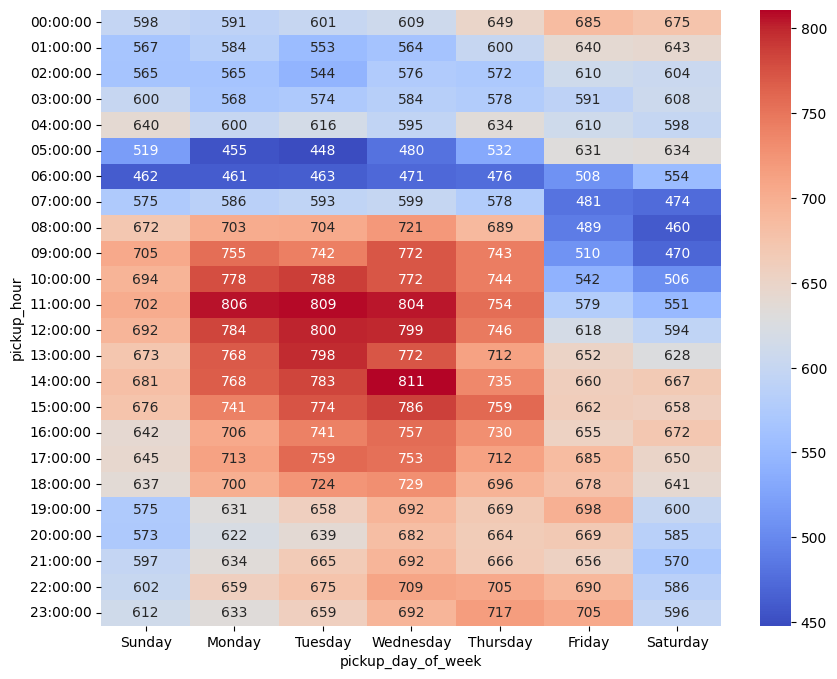

In [28]:
# ваш код здесь
taxi = taxi_data.copy()
taxi['pickup_hour'] = pd.to_datetime(taxi['pickup_hour'],format='%H').dt.time
mask_pt = pd.pivot_table(data=taxi,index = 'pickup_hour',columns='pickup_day_of_week',values='trip_duration',aggfunc='median')
# Замена значений на названия дней недели
x_labels = [0.5,1.5,2.5,3.5,4.5,5.5,6.5]
day_week = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
fig,ax = plt.subplots(figsize=(10,8))
sns.heatmap(mask_pt,ax=ax,cmap='coolwarm',annot=True,fmt='.3g');
ax.set_xticks(x_labels,day_week) 
plt.show()

Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.
Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня.

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


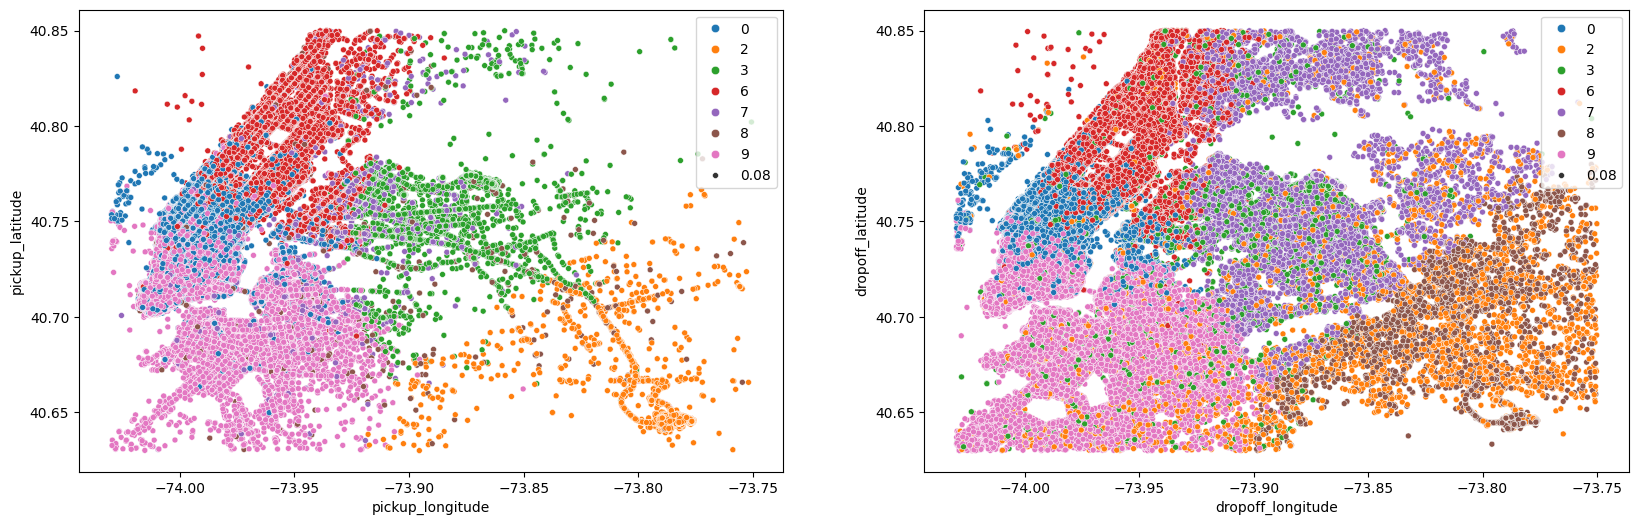

In [29]:
# ваш код здесь
# делаем копию нашего датасета, что бы в любой момент могли менять его.
taxi = taxi_data.copy()
# границы Нью-Йорка
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
# маски для фильтрации по долготе и широте
p_long = taxi['pickup_longitude']
p_lat = taxi['pickup_latitude']
d_long = taxi['dropoff_longitude']
d_lat = taxi['dropoff_latitude']
# фильтруем наш датасет по условиям выше для долготы и широты.
df_mask_pickup = taxi[
    ((p_long <= city_long_border[1]) & (p_long >= city_long_border[0])) &
    ((p_lat >= city_lat_border[0]) & (p_lat <= city_lat_border[1]))]
df_mask_dropoff = taxi[
    ((d_long <= city_long_border[1]) & (d_long >= city_long_border[0])) &
    ((d_lat >= city_lat_border[0]) & (d_lat <= city_lat_border[1]))]

# рисуем фигуру из двух плоскостей
fig,ax = plt.subplots(1,2,figsize=(20,6))

# график рассеивания для посадки пассажиров
sns.scatterplot(data=df_mask_pickup, 
                x='pickup_longitude', y='pickup_latitude',
                ax=ax[0],hue='geo_cluster',size=0.08,palette='tab10',legend='auto')
# график для высадки
sns.scatterplot(data=df_mask_dropoff, x='dropoff_longitude', y='dropoff_latitude', 
                ax=ax[1], hue='geo_cluster',palette='tab10',size=0.08,legend='auto')
# выведем легенду в правом верхнем углу, что бы сразу уменьшить время работы алгоритма, 
# т.к. выбор лучшей позиции это тоже время.

ax[0].legend(loc='upper right')
ax[1].legend(loc='upper right')
plt.show()

У нас получилось, что два кластера отсутствует вообще в границах города Нью-Йорка, это значит, что и посадка и высадка происходит за городом. Так же видим, что кластер номер 9 похож на центр города, т.к. посадка идет почти в одном месте, а высадка идет по всему городу. Люди приезжают в город отдохнуть и посмотреть его, а далее на такси уже едут обратно по всему городу.

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [30]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'pickup_date', 'pickup_hour',
       'pickup_day_of_week', 'pickup_holiday', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [31]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,dropoff_datetime,passenger_count,pickup_longitude,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14,17,0,0,2016-03-14 17:32:30,1,-73.982155,...,5.0,1.498521,99.970196,6,4.4,8.0,27.8,0.3,NaN,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12,0,6,0,2016-06-12 00:54:38,1,-73.980415,...,6.0,1.805507,-117.153768,9,28.9,16.1,7.4,0.0,NaN,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19,11,1,0,2016-01-19 12:10:48,1,-73.979027,...,16.0,6.385098,-159.680165,9,-6.7,16.1,24.1,0.0,NaN,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06,19,2,0,2016-04-06 19:39:40,1,-74.010040,...,4.0,1.485498,-172.737700,9,7.2,16.1,25.9,0.0,NaN,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26,13,5,0,2016-03-26 13:38:10,1,-73.973053,...,5.0,1.188588,179.473585,6,9.4,16.1,9.3,0.0,NaN,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [32]:
# ваш код здесь
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in train_data.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, train_data[col].nunique(),train_data[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(f"Признак: {unique_counts['Column_Name'].values[-1]},имеющий в себе {unique_counts['Num_Unique'].values[-1]} уникальных значений")
train_data.drop(['id','dropoff_datetime'],axis=1,inplace=True)
print('количество признаков после удаления:', train_data.shape[1])

'Признак: id,имеющий в себе 1458233 уникальных значений'

количество признаков после удаления: 25


Наиболее вероятный признак, который будет создавать утечку данных, это время высадки пассажиров, т.к. это напрямую указывает на общее время поездки.

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [33]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.

Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [34]:
# ваш код здесь
# Используем лямда функцию для кодировки двух признаков
train_data['vendor_id'] = train_data['vendor_id'].apply(lambda x: 0 if x==1 else 1)
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(lambda x: 0 if x=='N' else 1)

print('среднее по столбцу vendor_id:',train_data['vendor_id'].mean().round(2))
print('среднее по столбцу store_and_fwd_flag:',train_data['store_and_fwd_flag'].mean().round(3))

среднее по столбцу vendor_id: 0.53
среднее по столбцу store_and_fwd_flag: 0.006


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В параметре handle_unknown установите значение 'ignore'. Это позволит коду отработать без ошибок в случае появления в тестовой выборке значений, отсутствующих в обучающей выборке.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Объявляем кодировщик
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [35]:
# ваш код здесь
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first',handle_unknown='ignore')
columns_to_change = ['pickup_day_of_week','geo_cluster','events']
df_onehot = train_data[columns_to_change]
enc.fit(df_onehot)
df_onehot = enc.transform(df_onehot).toarray()
cols_onehot = enc.get_feature_names_out()
data_onehot = pd.DataFrame(df_onehot, columns=cols_onehot)
print('количество столбцов, полученных после кодирования:', len(cols_onehot))

количество столбцов, полученных после кодирования: 18


Добавим полученную таблицу с закодированными признаками:

In [36]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [37]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [38]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [39]:
# ваш код здесь
from sklearn.feature_selection import SelectKBest,f_regression

selector = SelectKBest(k=25,score_func=f_regression)
selector.fit(X_train,y_train_log)

cols_Kbest = selector.get_feature_names_out()  
X_train_K_best = X_train[cols_Kbest]
X_valid_K_best = X_valid[cols_Kbest]
cols_Kbest

array(['vendor_id', 'pickup_hour', 'pickup_holiday', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'total_distance',
       'total_travel_time', 'number_of_steps', 'haversine_distance',
       'temperature', 'pickup_day_of_week_1', 'pickup_day_of_week_2',
       'pickup_day_of_week_3', 'pickup_day_of_week_4',
       'pickup_day_of_week_5', 'pickup_day_of_week_6', 'geo_cluster_2',
       'geo_cluster_3', 'geo_cluster_6', 'geo_cluster_7', 'geo_cluster_8'],
      dtype=object)

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [40]:
# ваш код здесь
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_K_best)

X_train_scaler = scaler.transform(X_train_K_best)
X_valid_scaler = scaler.transform(X_valid_K_best)

print('avg для первого столбца матрицы:',X_valid_scaler.T[0].mean().round(2))

avg для первого столбца матрицы: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [41]:
# ваш код здесь
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

mod_lin_Reg = LinearRegression()
mod_lin_Reg.fit(X_train_scaler,y_train_log)

predict_X_train_LR = mod_lin_Reg.predict(X_train_scaler)
predict_X_valid_LR = mod_lin_Reg.predict(X_valid_scaler) 

print('Значение RMSLE на тренировочных данных:',root_mean_squared_error(y_train_log,predict_X_train_LR).round(2))
print('Значение RMSLE на валидационных данных:',root_mean_squared_error(y_valid_log,predict_X_valid_LR).round(2))

Значение RMSLE на тренировочных данных: 0.54
Значение RMSLE на валидационных данных: 0.54


### Задание 5.2.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [42]:
# ваш код здесь
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(X_train_scaler,y_train_log)

predict_X_train_Tree = model_tree.predict(X_train_scaler)
predict_X_valid_Tree = model_tree.predict(X_valid_scaler) 

print('Значение RMSLE на тренировочных данных:',root_mean_squared_error(y_train_log,predict_X_train_Tree).round(2))
print('Значение RMSLE на валидационных данных:',root_mean_squared_error(y_valid_log,predict_X_valid_Tree).round(2))

Значение RMSLE на тренировочных данных: 0.0
Значение RMSLE на валидационных данных: 0.56


Сильная разность между выборками, что говорит нам, модель переобученная, т.к. не имеет ограничения в глубине и максимальном количесве листьев дерева. 

### Задание 5.3.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depth = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


/home/roman/.local/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


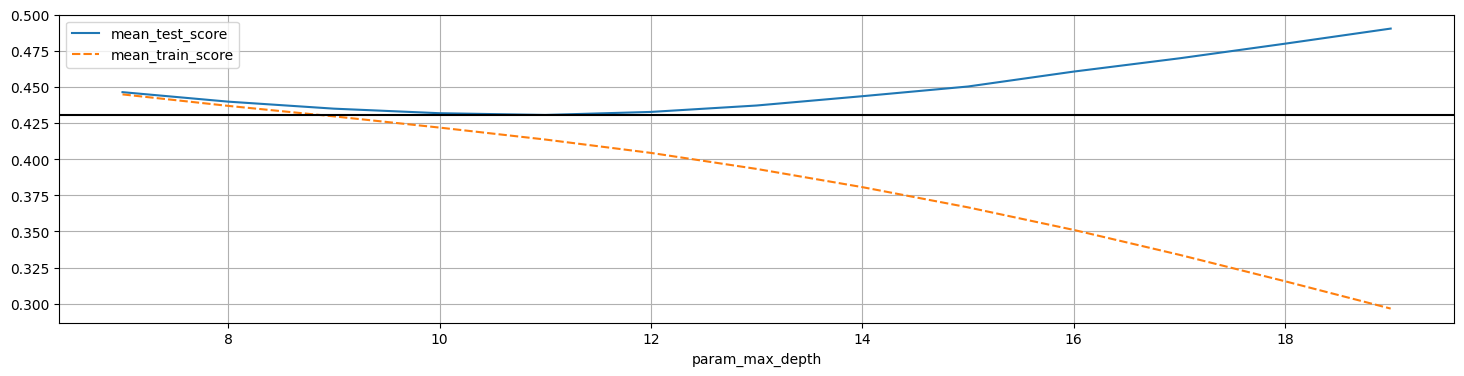

In [44]:
# ваш код здесь
from sklearn.model_selection import GridSearchCV
# создадить нашу модель ML
model_tree_2 = DecisionTreeRegressor(random_state=42)
# дополнительная сетка параметров для поиска 
grid = {'max_depth':range(7,20)}
# создадим модель поиска гиперпараметов
GD=GridSearchCV(estimator=model_tree_2,
                param_grid=grid,
                return_train_score=True,
                scoring='neg_root_mean_squared_error',
                n_jobs=-1)
# обучим модель поиска на наших тренировочных данных
GD.fit(X_train_scaler,y_train_log)
# для нашего графика понадобится сводная таблица из параметра, метрики на тестовых и тренировочных данных
summary_df = pd.pivot_table(pd.DataFrame(GD.cv_results_),index='param_max_depth',values=['mean_train_score','mean_test_score'])
# для понимания сделаем эти метрики положительными
minscore_depth_valid = np.min(np.abs(summary_df['mean_test_score']))
# нарисуем график
fig,ax = plt.subplots(figsize=(18,4))
sns.lineplot(np.abs(summary_df),ax=ax)
ax.axhline(minscore_depth_valid,color='black',ls='-')
ax.grid()
ax.legend();

И так на графике мы можем заметить следующее:
* Дополнительная горизонтальная линия выставлена по минимальной ошибке валидационных данных.
* Минимум находится на цифре 11, но эта линия слилась с графиком на отрезке 10-12.  
* Средняя ошибка на тестовых данных уходит вверх, там самым показывая, что модель начала переобучаться, т.к. тренировочные данные пошли на уменьшение.

In [45]:
# создадим модель и обучим ее на тренировочных данных
model_final_Tree = DecisionTreeRegressor(random_state=42,max_depth=12)
model_final_Tree.fit(X_train_scaler,y_train_log)
# сделаем предсказание 
predict_X_train_Tree_F = model_final_Tree.predict(X_train_scaler)
predict_X_valid_Tree_F = model_final_Tree.predict(X_valid_scaler) 
# выведем на экран
print('Значение RMSLE на тренировочных данных:',root_mean_squared_error(y_train_log,predict_X_train_Tree_F).round(2))
print('Значение RMSLE на валидационных данных:',root_mean_squared_error(y_valid_log,predict_X_valid_Tree_F).round(2))

Значение RMSLE на тренировочных данных: 0.41
Значение RMSLE на валидационных данных: 0.43


## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [46]:
# ваш код здесь
from sklearn.ensemble import RandomForestRegressor
# создаем модель случайного леса
model_random_forest = RandomForestRegressor(n_estimators=200,
                                            max_depth=12,
                                            criterion='squared_error',min_samples_split=20,
                                            random_state=42)
model_random_forest.fit(X_train_scaler,y_train_log)
# делаем предсказание
predict_X_train_RF = model_random_forest.predict(X_train_scaler)
predict_X_valid_RF = model_random_forest.predict(X_valid_scaler) 
# выведем на экран
print('Значение RMSLE на тренировочных данных:',root_mean_squared_error(y_train_log,predict_X_train_RF).round(2))
print('Значение RMSLE на валидационных данных:',root_mean_squared_error(y_valid_log,predict_X_valid_RF).round(2))


Значение RMSLE на тренировочных данных: 0.4
Значение RMSLE на валидационных данных: 0.41


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [47]:
# ваш код здесь
from sklearn.ensemble import GradientBoostingRegressor
model_boost = GradientBoostingRegressor(learning_rate=0.5,
                                        n_estimators=100,
                                        max_depth=6,
                                        min_samples_split=30,
                                        random_state = 42)
model_boost.fit(X_train_scaler,y_train_log)
# делаем предсказание
predict_X_train_boost = model_boost.predict(X_train_scaler)
predict_X_valid_boost = model_boost.predict(X_valid_scaler) 
# выведем на экран
print('Значение RMSLE на тренировочных данных:',root_mean_squared_error(y_train_log,predict_X_train_boost).round(2))
print('Значение RMSLE на валидационных данных:',root_mean_squared_error(y_valid_log,predict_X_valid_boost).round(2))

Значение RMSLE на тренировочных данных: 0.37
Значение RMSLE на валидационных данных: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


Все метрики не значительно отличаются друг от друга, но лучшую показал Градиентный бустинг.

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


топ-3 наиболее значимых факторов для модели
             feature  importants
0     total_distance    0.629763
1  total_travel_time    0.186304
2        pickup_hour    0.059111


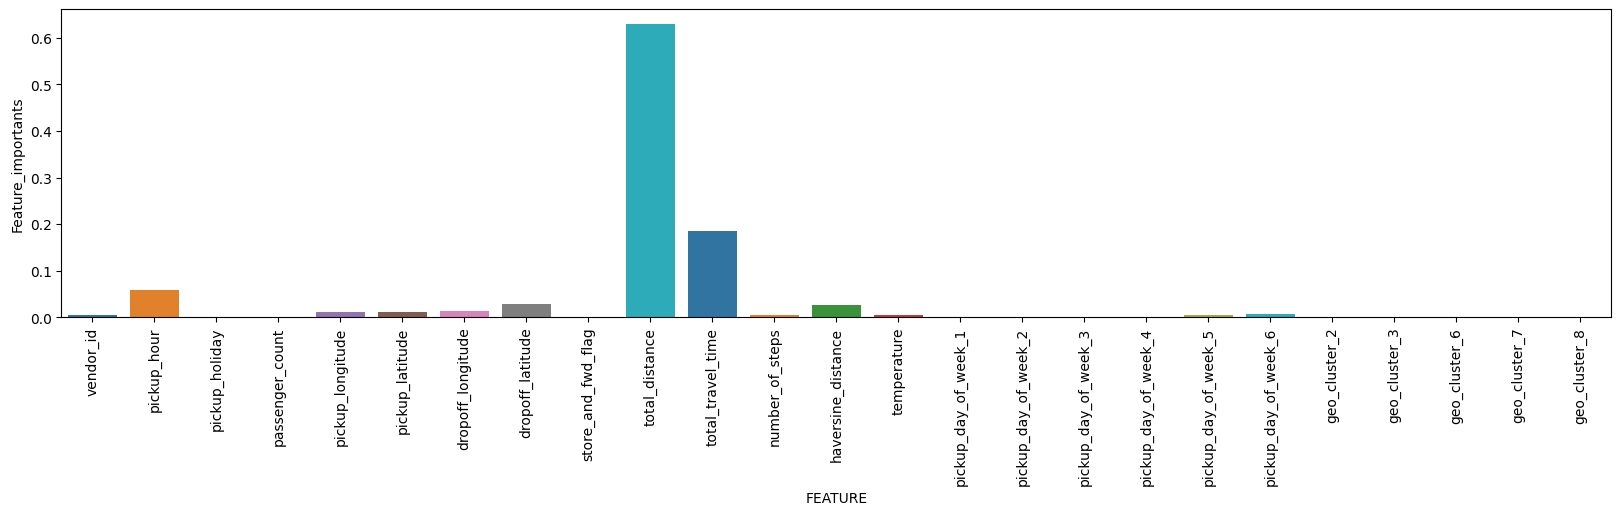

In [48]:
# ваш код здесь
print('топ-3 наиболее значимых факторов для модели')
print(pd.DataFrame({'feature':cols_Kbest,'importants':model_boost.feature_importances_}).sort_values(by='importants',ascending=False,ignore_index=True).head(3))
fig, ax = plt.subplots(figsize=(20, 4))
sns.barplot(x=cols_Kbest, y=model_boost.feature_importances_, ax=ax,hue=cols_Kbest,palette='tab10')
ax.xaxis.set_tick_params(rotation=90);
ax.set_xlabel('FEATURE')
ax.set_ylabel('Feature_importants')
plt.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [49]:
# ваш код здесь
y_valid = np.array(np.exp(y_valid_log)-1)
predict_no_log = np.exp(predict_X_valid_boost) -1
print('Медианная абсолютная ошибка в минутах:',(metrics.median_absolute_error(y_valid,predict_no_log)/60).round(1))

Медианная абсолютная ошибка в минутах: 1.8


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [50]:
test_data = pd.read_csv("test_data.csv")
osrm_data_test = pd.read_csv("Osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [51]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = enc.fit_transform(test_data[columns_to_change]).toarray()
column_names = enc.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[cols_Kbest]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

/home/roman/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [52]:
y_test_predict = model_boost.predict(X_test_scaled)
y_test_predict = np.exp(y_test_predict) - 1

In [53]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


In [54]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [55]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(data=pd.DataFrame(X_train_scaler), label=y_train_log, feature_names=list(cols_Kbest))
dvalid = xgb.DMatrix(data=pd.DataFrame(X_valid_scaler), label=y_valid_log, feature_names=list(cols_Kbest))
dtest = xgb.DMatrix(X_test_scaled, feature_names=list(cols_Kbest))

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [56]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

[0]	train-rmse:0.74154	valid-rmse:0.74355
[10]	train-rmse:0.49107	valid-rmse:0.49368
[20]	train-rmse:0.44081	valid-rmse:0.44368
[30]	train-rmse:0.42621	valid-rmse:0.42924
[40]	train-rmse:0.41878	valid-rmse:0.42202
[50]	train-rmse:0.41387	valid-rmse:0.41745
[60]	train-rmse:0.40989	valid-rmse:0.41383
[70]	train-rmse:0.40677	valid-rmse:0.41101
[80]	train-rmse:0.40448	valid-rmse:0.40906
[90]	train-rmse:0.40245	valid-rmse:0.40726
[100]	train-rmse:0.40056	valid-rmse:0.40563
[110]	train-rmse:0.39902	valid-rmse:0.40431
[120]	train-rmse:0.39762	valid-rmse:0.40315
[130]	train-rmse:0.39636	valid-rmse:0.40219
[140]	train-rmse:0.39548	valid-rmse:0.40155
[150]	train-rmse:0.39438	valid-rmse:0.40072
[160]	train-rmse:0.39349	valid-rmse:0.40009
[170]	train-rmse:0.39268	valid-rmse:0.39954
[180]	train-rmse:0.39186	valid-rmse:0.39901
[190]	train-rmse:0.39102	valid-rmse:0.39852
[200]	train-rmse:0.39042	valid-rmse:0.39819
[210]	train-rmse:0.38981	valid-rmse:0.39794
[220]	train-rmse:0.38886	valid-rmse:0.39731

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [57]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39481


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

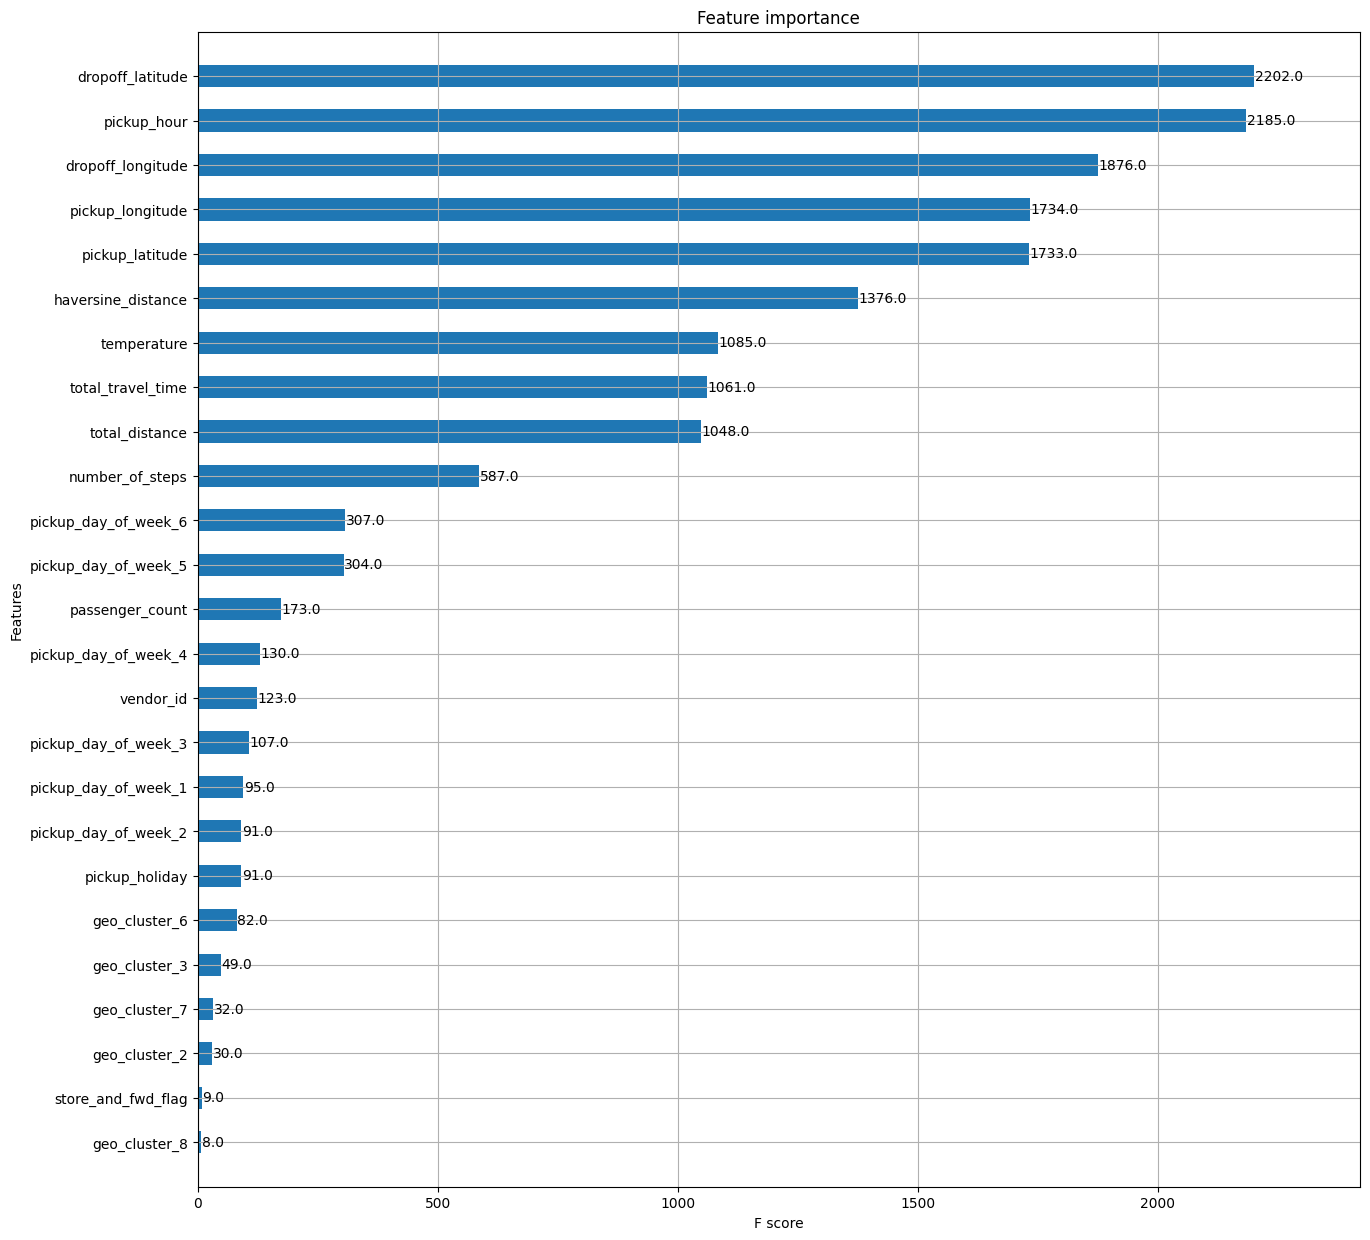

In [58]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)